In [ ]:
import geopandas as gpd
import pandas as pd
from glob import glob

In [331]:
state_fips = "37"
state="NC"
level = "vtd"
county_name = "Durham"
filter_string_precinct = "vtd:"

In [332]:
county_file = glob(f"/Users/peterrock/Library/CloudStorage/Dropbox/test_geopackages_gerrydb/raw_db_load_files/raw_geo_files/2020/county/{state_fips}_county_2020*.parquet")[0]
precinct_file = glob(f"/Users/peterrock/Library/CloudStorage/Dropbox/test_geopackages_gerrydb/raw_db_load_files/raw_geo_files/2020/vtd/{state_fips}_vtd_2020*.parquet")[0]
# bg_file = glob(f"/Users/peterrock/Library/CloudStorage/Dropbox/test_geopackages_gerrydb/raw_db_load_files/raw_geo_files/2020/bg/{state_fips}_bg_2020*.parquet")[0]

In [333]:
pop_file = f"/Users/peterrock/Library/CloudStorage/Dropbox/MADLAB/Git_Repos/mggg/GerryDB/districtr_data_stuff/state_pop_lit/2020/{level}/{state_fips}_{level}_legal_cat.parquet"
vap_file = f"/Users/peterrock/Library/CloudStorage/Dropbox/MADLAB/Git_Repos/mggg/GerryDB/districtr_data_stuff/state_vap_lit/2020/{level}/{state_fips}_{level}_legal_cat.parquet"

In [334]:
elections_file = f"/Users/peterrock/Library/CloudStorage/Dropbox/MADLAB/Git_Repos/mggg/GerryDB/districtr_data_stuff/processed_elections_final/{level}/daves_elections_{state_fips}_{level}.parquet"

In [335]:
county_gdf = gpd.read_parquet(county_file)
precinct_gdf = gpd.read_parquet(precinct_file)
# bg_gdf = gpd.read_parquet(bg_file)

In [336]:
county_fips = county_gdf.query(f" NAME20 == '{county_name}' ")["COUNTYFP20"].to_list()[0]
county_gdf.query(f" NAME20 == '{county_name}' ")

,STATEFP20,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CSAFP20,CBSAFP20,METDIVFP20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
64,37,063,01008550,37063,Durham,Durham County,06,H1,G4020,450,20500,None,A,742095312,29365150,+36.0338282,-078.8781246,"POLYGON ((-78.98263 36.05654, -78.98262 36.056..."


In [337]:
election_df = pd.read_parquet(elections_file)
election_df

,pres_08_dem,pres_08_rep,pres_12_dem,pres_12_rep,sen_14_dem,sen_14_rep,pres_16_dem,pres_16_rep,sen_16_dem,sen_16_rep,...,ltg_20_dem,ltg_20_rep,sos_20_dem,sos_20_rep,treas_20_dem,treas_20_rep,sen_22_dem,sen_22_rep,cong_22_dem,cong_22_rep
VTD,,,,,,,,,,,,,,,,,,,,,
vtd:37001000001,565,1424,487,1667,292,1074,411,1864,418,1828,...,556,2336,617,2251,611,2240,393,1702,388,1749
vtd:37001000002,508,1782,424,1933,308,1245,403,2004,396,1973,...,556,2391,663,2270,603,2319,423,1872,394,1932
vtd:37001000004,688,1773,631,1952,390,1285,577,2041,570,2033,...,691,2486,824,2322,756,2377,477,1766,466,1819
vtd:37001000005,399,1295,364,1362,250,853,327,1447,320,1429,...,435,1715,506,1629,501,1625,300,1309,289,1342
vtd:37001000007,511,1434,422,1594,311,1030,450,1670,436,1655,...,578,2013,659,1903,595,1968,437,1511,440,1545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vtd:3719907-BRU,145,140,126,126,96,112,91,163,96,158,...,97,224,113,198,107,199,80,188,77,191
vtd:3719908-CRA,764,1022,641,1080,553,852,522,1260,587,1204,...,582,1395,633,1316,607,1329,426,1091,400,1118
vtd:3719909-SOU,661,593,614,633,563,548,596,766,622,733,...,672,863,705,816,683,820,592,715,587,743


In [338]:
filter_string = f"{filter_string_precinct}{state_fips}{county_fips}"

In [339]:
pop_df = pd.read_parquet(pop_file)
filtered_pop_df = pop_df[pop_df.index.str.startswith(filter_string)]

vap_df = pd.read_parquet(vap_file)
filtered_vap_df = vap_df[vap_df.index.str.startswith(filter_string)]

election_df = pd.read_parquet(elections_file)
filtered_election_df = election_df[election_df.index.str.startswith(filter_string)]

In [340]:
filtered_precinct_gdf = precinct_gdf.query(f" COUNTYFP20 == '{county_fips}' ")
filtered_precinct_gdf

# filtered_bg_gdf = bg_gdf.query(f" COUNTYFP20 == '{county_fips}' ")
# filtered_bg_gdf

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
67,37,063,000037,37063000037,A,COLE MILL CHURCH,COLE MILL CHURCH,00,G5240,N,15061584,235156,+36.0562712,-078.9472218,"POLYGON ((-78.98584 36.0382, -78.98578 36.0385..."
68,37,063,000017,37063000017,A,COUNTY MAIN LIBRARY,COUNTY MAIN LIBRARY,00,G5240,N,2508058,0,+35.9959735,-078.8936776,"POLYGON ((-78.90388 35.99697, -78.90386 35.997..."
69,37,063,000012,37063000012,A,MONUMENT OF FAITH CHURCH,MONUMENT OF FAITH CHURCH,00,G5240,N,811925,0,+35.9820512,-078.8953163,"POLYGON ((-78.90043 35.97792, -78.9002 35.9786..."
70,37,063,000042,37063000042,A,SHEPHARD MAGNET SCHOOL,SHEPHARD MAGNET SCHOOL,00,G5240,N,2275256,0,+35.9598587,-078.9009519,"POLYGON ((-78.91054 35.9595, -78.91052 35.9597..."
71,37,063,000041,37063000041,A,WHITE ROCK BAPTIST CHURCH,WHITE ROCK BAPTIST CHURCH,00,G5240,N,2264372,0,+35.9555643,-078.9174913,"POLYGON ((-78.92871 35.94809, -78.92866 35.948..."
72,37,063,000036,37063000036,A,YATES BAPTIST CHURCH,YATES BAPTIST CHURCH,00,G5240,N,3480485,4206,+35.9647064,-078.9451707,"POLYGON ((-78.96144 35.96168, -78.9605 35.9626..."
73,37,063,000016,37063000016,A,HOLY INFANT CATHOLIC,HOLY INFANT CATHOLIC,00,G5240,N,2488781,1893,+35.9186696,-078.9414868,"POLYGON ((-78.96129 35.91895, -78.96097 35.919..."
74,37,063,000024,37063000024,A,DPS STAFF DEVELOPMENT CENTER,DPS STAFF DEVELOPMENT CENTER,00,G5240,N,7013535,48380,+36.0353521,-078.9332540,"POLYGON ((-78.95441 36.03592, -78.95412 36.036..."
75,37,063,000021,37063000021,A,CLUB BOULEVARD SCHOOL,CLUB BOULEVARD SCHOOL,00,G5240,N,2705648,0,+36.0255359,-078.8973515,"POLYGON ((-78.90564 36.03347, -78.90549 36.033..."
76,37,063,000020,37063000020,A,COUNTY AGRICULTURAL BUILDING,COUNTY AGRICULTURAL BUILDING,00,G5240,N,1662125,0,+36.0108432,-078.8988843,"POLYGON ((-78.90564 36.00608, -78.90563 36.006..."


In [341]:
filtered_precinct_gdf.to_parquet(f"{county_name}_County-{state}/{county_name}_precincts.parquet")
# filtered_bg_gdf.to_parquet(f"{county_name}_County-{state}/{county_name}_blockgroups.parquet")
filtered_pop_df.to_parquet(f"{county_name}_County-{state}/{county_name}_pop.parquet")
filtered_vap_df.to_parquet(f"{county_name}_County-{state}/{county_name}_vap.parquet")
filtered_election_df.to_parquet(f"{county_name}_County-{state}/{county_name}_elections.parquet")

In [344]:
filtered_pop_df

,tot_pop_20,bpop_20,hpop_20,asian_nhpi_pop_20,amin_pop_20,other_pop_20,white_pop_20
id,,,,,,,
vtd:37063000001,2612,802,875,66,17,23,829
vtd:37063000002,4746,2206,561,199,24,34,1722
vtd:37063000003,3395,179,322,439,24,58,2373
vtd:37063000004,2022,127,174,95,17,34,1575
vtd:37063000005,11402,5130,1320,2133,32,129,2658
vtd:37063000006,3220,751,745,223,8,37,1456
vtd:37063000007,3337,362,331,255,29,37,2323
vtd:37063000008,3736,1495,385,295,24,36,1501
vtd:37063000009,3417,1001,368,128,14,39,1867


<Axes: >

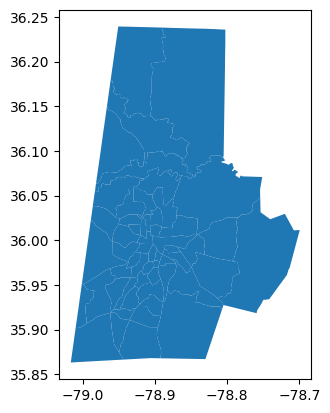

In [343]:
filtered_precinct_gdf.plot()

In [269]:
gdf = gpd.read_parquet("/Users/peterrock/Library/CloudStorage/Dropbox/test_geopackages_gerrydb/raw_db_load_files/raw_geo_files/2020/place/39_place_2020--db3a7f2bf52892e6943dd0ba41b7e110747182caac6010147cc03758dfb41c20.parquet")

<Axes: >

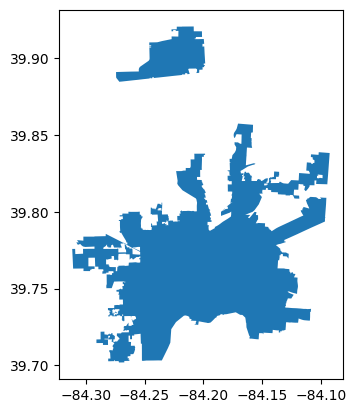

In [272]:
gdf[gdf["NAME20"] == "Dayton"].plot()